In [13]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


c:\software\python\python3.7.4\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
mu = 2.0
variance = 2.0
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [15]:
# proposal
def q(x):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    mu = x+2.0
    sigma = 1.0
    
    # draw from a normal distribution with mean mu and standard deviation sigma
    return mu + sigma*randn()

In [16]:
# density function f(x)
def f(x):
    mu = 2
    sigma = math.sqrt(2)
    return 1.0/(sigma*math.sqrt(2.0*pi)) * exp(-0.5 * ((x-mu)/sigma)**2)

In [26]:
xs = [3]    # initialize MCMC algorithm with arbitrary starting value of x
for i in range(10000):
    x = xs[-1]
    x_new = q(x)
    x_new -= 2.0      # make corrections for x_new, shift its value back by 2.0
    accept_ratio = f(x_new)/f(x)
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

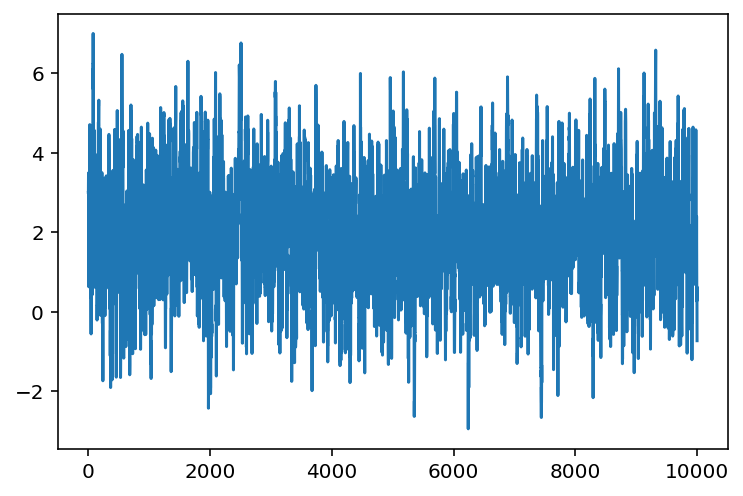

In [27]:
plot(xs)

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.00080413, 0.00361858, 0.01065472, 0.02392286, 0.05669115,
        0.08785117, 0.13690309, 0.21269231, 0.25410499, 0.26154319,
        0.26677004, 0.22756871, 0.18052712, 0.11921223, 0.08001091,
        0.0526705 , 0.02050531, 0.01025265, 0.00321652, 0.00100516]),
 array([-2.94682183, -2.44943939, -1.95205696, -1.45467452, -0.95729208,
        -0.45990965,  0.03747279,  0.53485523,  1.03223766,  1.5296201 ,
         2.02700254,  2.52438498,  3.02176741,  3.51914985,  4.01653229,
         4.51391472,  5.01129716,  5.5086796 ,  6.00606203,  6.50344447,
         7.00082691]),
 <a list of 20 Patch objects>)

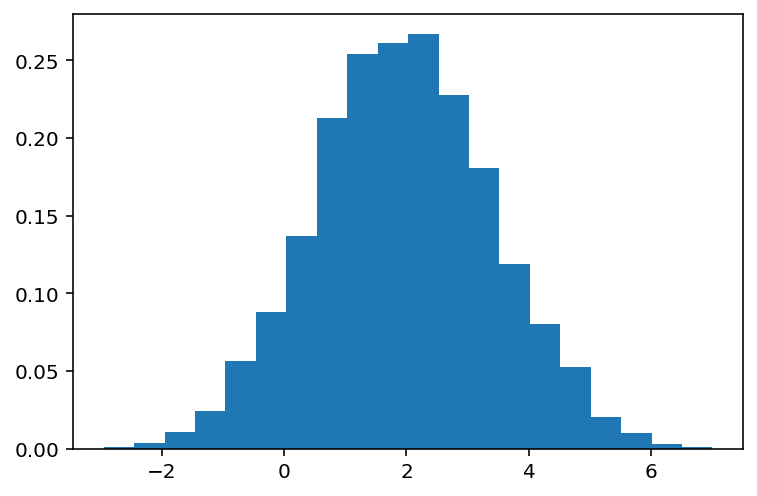

In [28]:
hist(xs, normed=True, bins=20)